### AI4eLIFE: Easying local image feature extraction using AI. 
**A data-centric AI for tumor segmentation from [18F]FDG-PET images.**

*This jupyter notebook is designed to explain how to run the proposed data-centric AI. It also illustrates how to visualize and interpret the results.*

In [1]:
# import important libraries
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# python script
import visualization as view

In [2]:
import warnings
warnings.filterwarnings('ignore')

####  Step 1: Prepare the data as described in the [readme.md](../../readme.md) file. 

For example, we have the input data inside the folder `E:/data/input/`. We want to save the output data under the `E:/data/output` folder. 

Let us examine the data structure. 

In [3]:
# check the folder structure of the main folder for the input and output data.
# function to print the folders, subfolders, and files in a given path "main_folder_path".
def list_folders_files(main_folder_path):
    for root_dir, dirs, files in os.walk(main_folder_path):
        folder_level = root_dir.replace(main_folder_path, '').count(os.sep)
        indentation = "-"*4*(folder_level) # tabe 
        print(f'{indentation}{os.path.basename(root_dir)}')
        
        sub_indentation = "-"*4*(folder_level + 1)
        
        for get_file in files:
            print(f'{sub_indentation}{get_file}')

main_directory = "E:/data"
list_folders_files(main_directory)

data
----input
--------patient_A
------------gt
----------------gt.nii
------------pet
----------------pet.nii.gz
--------patient_B
------------gt
----------------gt.nii
------------pet
----------------pet.nii.gz
--------patient_C
------------gt
----------------gt.nii
------------pet
----------------pet.nii.gz
--------patient_D
------------ct
----------------ct.nii.gz
------------gt
----------------gt.nii
------------pet
----------------pet.nii.gz
----output


We have the two main folders, `input` and `output` folders. Under the `input` folder, we do have the structured data. 

####  Step 2: Download/Clone the repository

In [5]:
# Let us clone the repository to a folder named "E:/step-by-step-test"
# create the directory
os.mkdir("E:/step-by-step-test") 

In [6]:
# change working directory 
os.chdir("E:/step-by-step-test/")
print(f"You are at {os.getcwd()} directory !")

You are at E:\step-by-step-test directory !


In [7]:
# clone or download the directory to the created folder: 
!git clone https://github.com/KibromBerihu/ai4elife.git

#### Step 3: Install the package using either the virtual environment or the Docker-based approach.
Kindly refer to [This](https://github.com/KibromBerihu/ai4elife#readme) for detailed installation instructions.

Change to the cloned `ai4elife` folder: `os.chdir  path/to/cloned/ai4elife/`

In [8]:
os.chdir('E:/step-by-step-test/ai4elife/')

If you choose option one installation using a virtual environment, activate the virtual environment: `conda activate myenv`

#### Step 4: Run the following command

Make sure you activate the virtual environment if you choose virtual environment-based testing. 

In [16]:
# Example 
!python test_env.py --input_dir "E:/data/input/" --output_dir "E:/data/output/"

Run the the following if you choose Docker-based testing: 

Option 1:`run_docker_image.bat E:/data/input/ E:/data/output DockerName Latest  ai_1`

Option 2: `docker run -it --rm --name ai_1 -v E:/data/input/:/input -v E:/data/output/:/output DockerName:Latest`

#### Step 5: Result visualization and interpretation: examine the output folder 

In [10]:
# Let us check the output directory.
main_directory = "E:/data/output/"
list_folders_files(main_directory)


----surrogate_ground_truth.csv
----surrogate_predicted.csv
data_default_3d_dir_
----patient_A
--------ground_truth.nii
--------pet.nii
----patient_B
--------ground_truth.nii
--------pet.nii
----patient_C
--------ground_truth.nii
--------pet.nii
----patient_D
--------ground_truth.nii
--------pet.nii
data_default_MIP_dir
----patient_A
--------ground_truth_coronal.nii
--------ground_truth_sagittal.nii
--------pet_coronal.nii
--------pet_sagittal.nii
----patient_B
--------ground_truth_coronal.nii
--------ground_truth_sagittal.nii
--------pet_coronal.nii
--------pet_sagittal.nii
----patient_C
--------ground_truth_coronal.nii
--------ground_truth_sagittal.nii
--------pet_coronal.nii
--------pet_sagittal.nii
----patient_D
--------ground_truth_coronal.nii
--------ground_truth_sagittal.nii
--------pet_coronal.nii
--------pet_sagittal.nii
predicted_data
----patient_A
--------patient_A_ground_truth.nii
--------patient_A_pet.nii
--------patient_A_predicted.nii
----patient_B
--------patient_B_grou

1. Given N patients in the input directory, the system produces N resized (4x4x4 voxel size) and cropped (128x128x256 resolution) 3D data under the folder name `data_default_3d_dir_`.
<br />

2. It generates corresponding maximum intensity projections (MIPs) and is saved under the folder name `data_default_MIP_dir`. 

 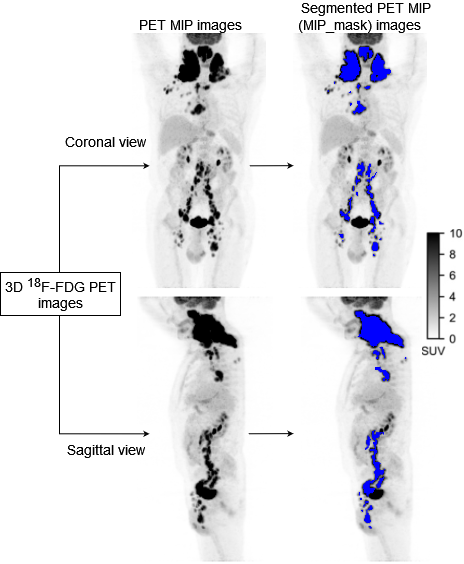
 
3. The LBFNet uses the generated MIP images under the folder `data_default_MIP_dir` to predict the lymphoma tumor regions. 
<br />

4. The predicted images are saved under the folder name  `predicted_data.`
<br />

5. Two excel files are generated.

    * The first excel file is with the name `surrogate_ground_truth.csv` for surrogate biomarker features calculated from the ground truth segmentations (lymphoma tumor regions from an expert), if available. If there is no ground truth data provided along with the pet images, this file will have all its values with zero.
   
    * The second CSV file, `surrogate_predicted.csv`, contains the surrogate biomarkers predicted by the AI algorithm. 


#### Step 6: Excel or csv file interpretation

In [11]:
# read the csv files
df_predicted = pd.read_csv("E:/data/output/surrogate_predicted.csv", encoding='latin1')
df_predicted.head()

PID  sTMTV_sagittal  sTMTV_coronal  sTMTV_(mm²)  Sagittal_xy  \
0  patient_A             737            768      24080.0         27.0   
1  patient_B             685            788      23568.0         22.0   
2  patient_C             396            438      13344.0         29.0   
3  patient_D             851            997      29568.0         38.0   

   Sagittal_z  Coronal_xy  Coronal_z  sDmax_(mm)  sDmax_(mm)_euclidean    X  \
0        51.0        28.0       51.0       628.0            327.780414  4.0   
1        75.0        29.0       75.0       804.0            448.553230  4.0   
2       105.0        59.0      106.0      1196.0            652.171757  4.0   
3        98.0        61.0       96.0      1172.0            619.483656  4.0   

     Y    Z  
0  4.0  4.0  
1  4.0  4.0  
2  4.0  4.0  
3  4.0  4.0

In [12]:
# Simple statistical description of the data. 
df_predicted.describe()

sTMTV_sagittal  sTMTV_coronal   sTMTV_(mm²)  Sagittal_xy  Sagittal_z  \
count        4.000000       4.000000      4.000000     4.000000     4.00000   
mean       667.250000     747.750000  22640.000000    29.000000    82.25000   
std        193.667025     231.012806   6766.278741     6.683313    24.45915   
min        396.000000     438.000000  13344.000000    22.000000    51.00000   
25%        612.750000     685.500000  21012.000000    25.750000    69.00000   
50%        711.000000     778.000000  23824.000000    28.000000    86.50000   
75%        765.500000     840.250000  25452.000000    31.250000    99.75000   
max        851.000000     997.000000  29568.000000    38.000000   105.00000   

       Coronal_xy   Coronal_z   sDmax_(mm)  sDmax_(mm)_euclidean    X    Y  \
count     4.00000    4.000000     4.000000              4.000000  4.0  4.0   
mean     44.25000   82.000000   950.000000            511.997264  4.0  4.0   
std      18.20943   24.372115   279.761803            151.836761  0.0  0.0   
min      28.00000   51.000000   628.000000            327.780414  4.0  4.0   
25%      28.75000   69.000000   760.000000            418.360026  4.0  4.0   
50%      44.00000   85.500000   988.000000            534.018443  4.0  4.0   
75%      59.50000   98.500000  1178.000000            627.655681  4.0  4.0   
max      61.00000  106.000000  1196.000000            652.171757  4.0  4.0   

         Z  
count  4.0  
mean   4.0  
std    0.0  
min    4.0  
25%    4.0  
50%    4.0  
75%    4.0  
max    4.0

Note: PID: Unique patient identifier, **sTMTV**: surrogate total metabolic tumor volume in pixels. `_coronal` and `_sagittal` indicate that the values were computed from the coronal and sagittal views, respectively. `Sagittal_xy` and `coronal_xy` indicate the dissemination along the `width` of the 2D sagittal and coronal PET MIP images, and the `Sagittal_z` and `coronal_z` indicate the dissemination along with the `height` of the 2D sagittal and coronal PET MIP images. The following figure illustrates computing the dissemination from the coronal view. 
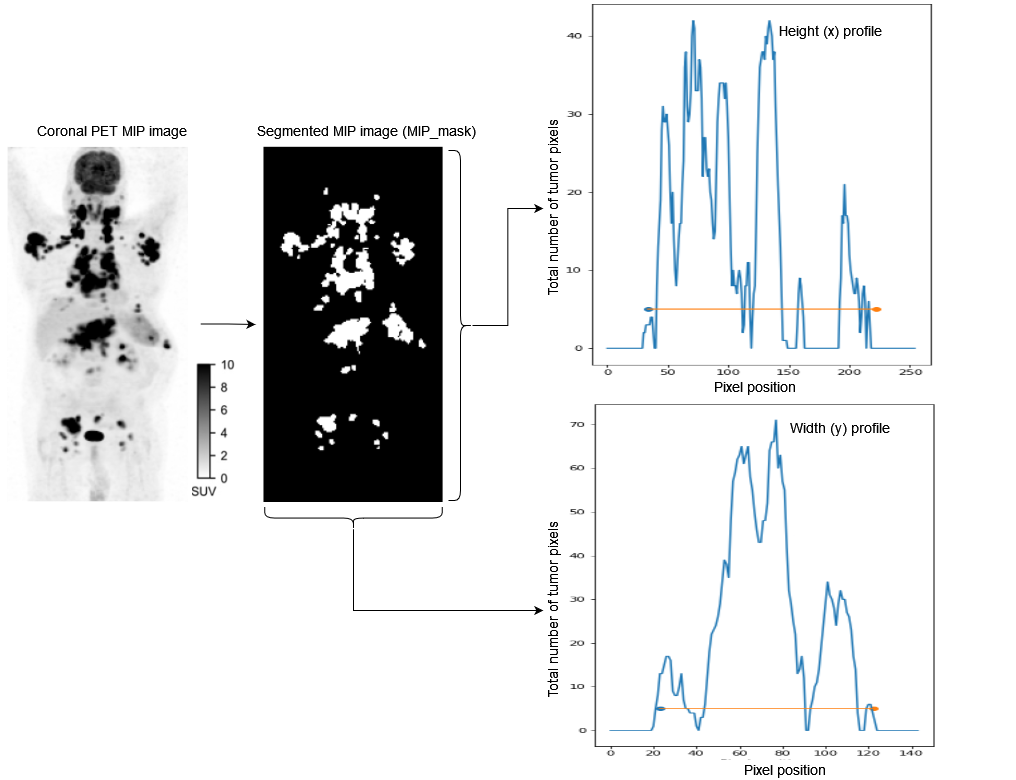

The **x, y**, and **z** are the voxel spacing of the images. 

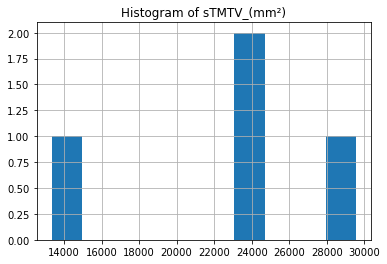

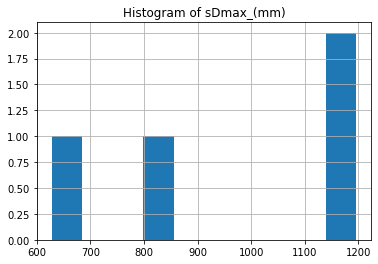

In [13]:
# Visualize the distribution of the computed biomarkers. 
plot_biomarker = ["sTMTV_(mm²)", "sDmax_(mm)"]
for biomarker in plot_biomarker:
    df_predicted[biomarker].hist()
    plt.title(f"Histogram of {biomarker}")
    plt.show()

#### Step 7: Visualization of the PET and their segmentation results 

Number of cases: 4
(2, 128, 256, 1)

 Image ID: 	 %s patient_A


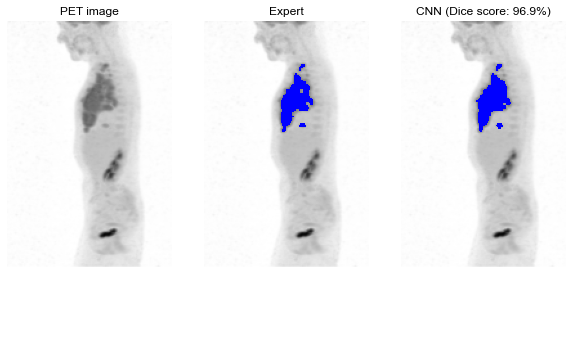


 Image ID: 	 %s patient_A


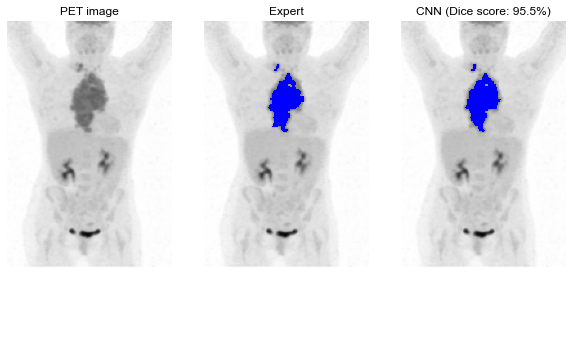

(2, 128, 256, 1)

 Image ID: 	 %s patient_B


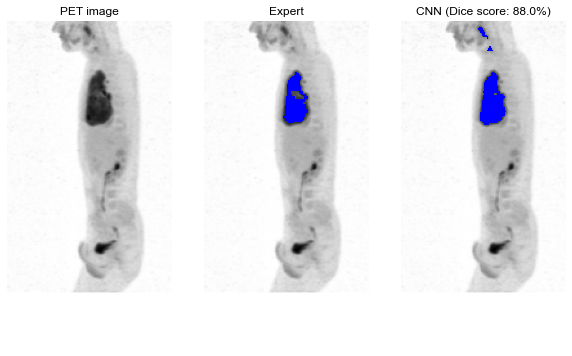


 Image ID: 	 %s patient_B


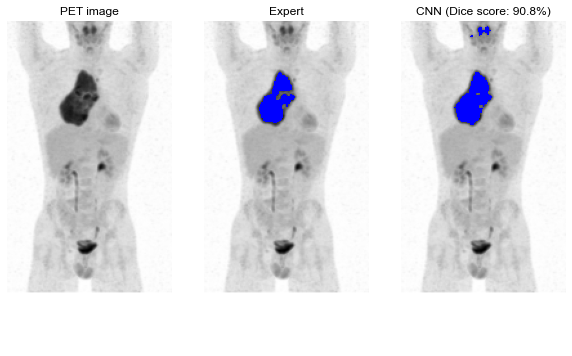

(2, 128, 256, 1)

 Image ID: 	 %s patient_C


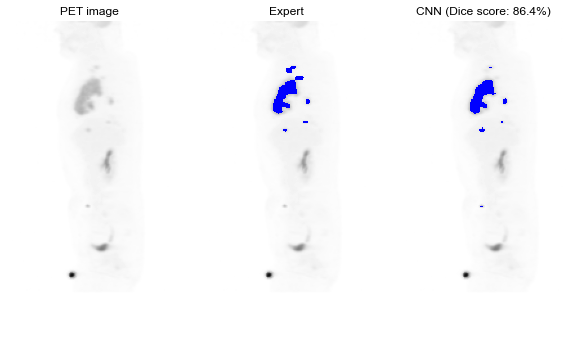


 Image ID: 	 %s patient_C


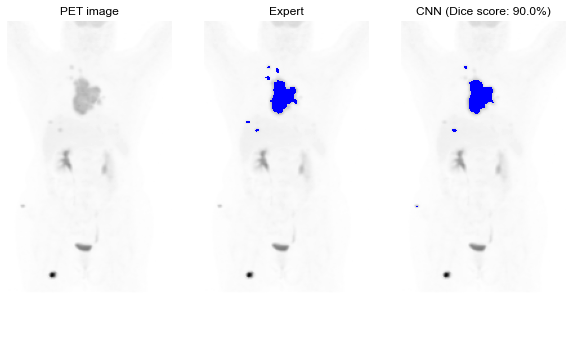

(2, 128, 256, 1)

 Image ID: 	 %s patient_D


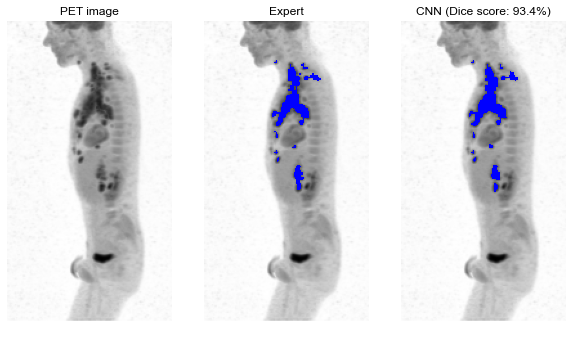


 Image ID: 	 %s patient_D


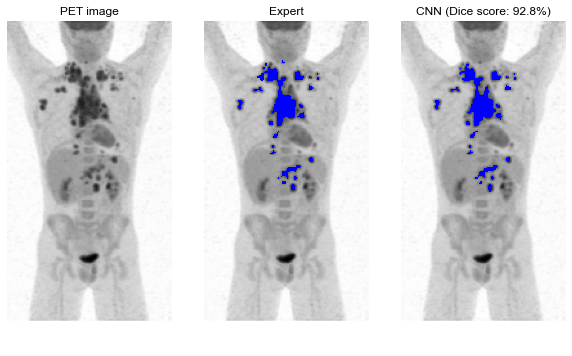

In [14]:
# data path
path = "E:/data/output/predicted_data//"
view.read_predicted_images(path)

Note that if no ground truth is provided it will only display the predicted images. 

Good job!